<a href="https://colab.research.google.com/github/claramoreirag/FEUP-NLP-2/blob/main/adu_classifier_hugging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADU Classifier 2.0

## Project Description

In this second assignment, you are challenged to employ Hugging Face transformers for the same classification task as in the first assignment.

You should explore Hugging Face models to find a pre-trained model that is suitable and promising for fine-tuning with data for the ADU type classification task. It should make sense to pick one that has been pre-trained with Portuguese (either in isolation or in a multi-lingual fashion), possibly with data from a similar genre.

As a bonus, you can also employ a domain adaptation approach, by leveraging on the full text of opinion articles made available.

### Our Task: Sequence/Sentence Classification

- [Hugging Face Task Summary Page](https://huggingface.co/docs/transformers/v4.19.2/en/task_summary)

### Portuguese Models Research

#### Articles

- [Hugging Face State of the Art for Portuguese NLP taks](https://medium.com/@pierre_guillou/estado-da-arte-do-nlp-com-as-bibliotecas-transformers-de-hugging-face-e-fastai-v2-992dd1fd3a8)
- [Sentence Classification Task](https://nlp.stanford.edu/projects/snli/)

#### Hugging Face Models Documentation
- [NER Portuguese News](https://huggingface.co/monilouise/ner_news_portuguese) (trained with news for sequence classification -> very similar to our ADU classification task but it's NER...)

- [BERT Portuguese](https://huggingface.co/neuralmind/bert-base-portuguese-cased) (BERT)
- [DistilBERT Portuguese](https://huggingface.co/adalbertojunior/distilbert-portuguese-cased) (BERT)
- [BERT Portuguese - Clustering Sentences](https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin) (BERT)

- [QA Portuguese](https://huggingface.co/pierreguillou/t5-base-qa-squad-v1.1-portuguese) (QA - not useful)
- [NER Portuguese Legal Texts](https://huggingface.co/pierreguillou/ner-bert-large-cased-pt-lenerbr) (NER - not useful)
- [GPortuguese-2](https://huggingface.co/pierreguillou/gpt2-small-portuguese) (GPT-2 - not useful)
- [Portuguese T5 - PTT5](https://huggingface.co/unicamp-dl/ptt5-base-portuguese-vocab) (T5 - not useful)


### [English Base Models Research & Comparison](https://huggingface.co/docs/transformers/v4.19.2/en/model_summary) (for this task and/or trained in Portuguese)

[Multilingual Hugging Face Models](https://huggingface.co/docs/transformers/multilingual)

- [Original GPT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/openai-gpt): "multitask language modeling/multiple choice classification" - doesn't seem useful to our task - trained to predict next token/exclusively in English

- [GPT-2](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/gpt2): "multitask language modeling/multiple choice classification" - doesn't seem useful to our task - trained to predict next token/exclusively in English

- [XLNet](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/xlnet): "language modeling, token classification, **sentence classification**, multiple choice classification and question answering." - has a version for our task - trained to predict next token/exclusively in English

- [BERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/bert): "language modeling (traditional or masked), next sentence prediction, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - trained to predict original sentence or if sentences are consecutive/**several languages used for training**

- [ALBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/albert): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - trained to predict original sentence or ordering of sentences/exclusively in English

- [RoBERTa](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/roberta): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - same as BERT training but better/exclusively in English

- [DistilBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/distilbert): " masked language modeling, token classification, **sentence classification** and question answering" - has a version for our task - same as BERT but smaller/exclusively in English

- [ConvBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/convbert): "masked language modeling, token classification, **sentence classification** and question answering" - has a version for our task - same as BERT but quicker/exclusively in English

- [XLM](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/xlm): "language modeling, token classification, **sentence classification** and question answering" - has a version for our task - trained for translation language modeling/**several languages used for training**

- [XLM-RoBERTa](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/xlm-roberta): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - trained for masked language modeling/**several languages used for training (more than XLM)**

- [FlauBERT](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/flaubert):"language modeling and **sentence classification**" - has a version for our task -  trained as RoBERTa but without the sentence ordering prediction/exclusively in English

- [ELECTRA](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/electra): "masked language modeling, token classification and **sentence classification**" - has a version for our task - "transformer model pretrained with the use of another (small) masked language model"/exclusively in English

- [Funnel Transformer](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/funnel): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering" - has a version for our task - "same pretraining objective as ELECTRA"/exclusively in English

- [Longformer](https://huggingface.co/docs/transformers/v4.19.2/en/model_doc/longformer) (needs context aka domain adaptation): "masked language modeling, token classification, **sentence classification**, multiple choice classification and question answering"- has a version for our task - "pretrained the same way a RoBERTa otherwise"/exclusively in English


In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/NLP

/content/gdrive/My Drive/NLP


In [3]:
#!git clone https://github.com/claramoreirag/FEUP-NLP-2.git

In [4]:
%cd FEUP-NLP-2

/content/gdrive/My Drive/NLP/FEUP-NLP-2


### Imports

In [5]:
!pip install datasets
!pip install pandas
!pip install transformers
!pip install seaborn
!pip install Cython
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 5.2 MB/s 
     |████████████████████████████████| 86 kB 7.3 MB/s 
     |████████████████████████████████| 212 kB 69.0 MB/s 
     |████████████████████████████████| 1.1 MB 66.4 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 140 kB 71.1 MB/s 
     |████████████████████████████████| 596 kB 61.5 MB/s 
     |████████████████████████████████| 127 kB 75.4 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 144 kB 73.2 MB/s 
     |████████████████████████████████| 271 kB 73.9 MB/s 
     |████████████████████████████████| 112 kB 79.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing ins

In [6]:
import pandas as pd
import seaborn as sb
import torch
import numpy as np

from matplotlib import pyplot as plt
from datasets import Dataset
from datasets import DatasetDict
from sklearn import preprocessing

### Getting the Data

For simplicity reasons, and to avoid duplicated code, you may check a throughout analysis of this dataset in the previous version of this project's [notebook](https://github.com/flaviacarvalhido/FEUP-NLP/blob/master/adu-classifier.ipynb). In this notebook, only the ambiguous features of the dataset will be displayed, as to justify future preprocessing steps applied to the dataset. Between those ambiguous features, one stands out: the presence of different labels for the same ADU.

In [7]:
# reading the datasets
articles = pd.read_excel('./OpArticles/OpArticles.xlsx')
adus = pd.read_excel('./OpArticles/OpArticles_ADUs.xlsx')
df= pd.read_excel('./OpArticles/OpArticles_ADUs.xlsx')

Get all the ADUs labelled by more than one annotator

In [8]:
repADUs = adus[adus.duplicated(
    ['ranges', 'article_id'], keep=False)].sort_values(by=['ranges'])
repADUs

,article_id,annotator,node,ranges,tokens,label
3428,5cf47371896a7fea06009c23,B,0,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
3444,5cf47371896a7fea06009c23,C,0,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
3426,5cf47371896a7fea06009c23,A,6,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
1654,5d04c505896a7fea06a0fabc,A,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Value
1669,5d04c505896a7fea06a0fabc,B,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Fact
...,...,...,...,...,...,...
9126,5cf462de896a7fea06ff9495,C,3,"[[998, 1032]]",a violência agravou-se brutalmente,Value(-)
9146,5cf462de896a7fea06ff9495,D,6,"[[998, 1032]]",a violência agravou-se brutalmente,Fact
15430,5cde31c4896a7fea063370a5,A,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value(-)
15449,5cde31c4896a7fea063370a5,B,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value


Get the rows where the same ADUs got a different label

In [9]:
difADUs = repADUs.drop_duplicates(
    subset=['article_id', 'ranges', 'label']).sort_values(by=['ranges'])
difADUs


,article_id,annotator,node,ranges,tokens,label
3428,5cf47371896a7fea06009c23,B,0,"[[0, 101]]",A fase da desconfiança em relação à sobrevivên...,Value
1654,5d04c505896a7fea06a0fabc,A,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Value
1669,5d04c505896a7fea06a0fabc,B,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Fact
6587,5cf4675d896a7fea06ffe0fe,C,0,"[[0, 105]]",Já lá vão uns valentes séculos desde que o Mar...,Fact
4654,5cf47065896a7fea060065b5,C,1,"[[0, 108]]",As instituições de ensino superior portuguesas...,Value(+)
...,...,...,...,...,...,...
5481,5cf46c00896a7fea06002671,C,13,"[[997, 1072]]",que disponibilize os resultados da investigaçã...,Policy
9104,5cf462de896a7fea06ff9495,B,5,"[[998, 1032]]",a violência agravou-se brutalmente,Value(-)
9146,5cf462de896a7fea06ff9495,D,6,"[[998, 1032]]",a violência agravou-se brutalmente,Fact
15430,5cde31c4896a7fea063370a5,A,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value(-)


Get all tokens in which there were different labels assigned

In [10]:
difADUs[difADUs.duplicated(['article_id', 'ranges'],
                           keep=False)].sort_values(by=['ranges'])

,article_id,annotator,node,ranges,tokens,label
1654,5d04c505896a7fea06a0fabc,A,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Value
1669,5d04c505896a7fea06a0fabc,B,0,"[[0, 104]]",Em dezembro do ano passado Fernando Medina ava...,Fact
4654,5cf47065896a7fea060065b5,C,1,"[[0, 108]]",As instituições de ensino superior portuguesas...,Value(+)
4691,5cf47065896a7fea060065b5,D,0,"[[0, 108]]",As instituições de ensino superior portuguesas...,Value
15413,5cddb333896a7fea062e8b18,B,0,"[[0, 109]]",Uma olimpíada da ciência da União Europeia ser...,Value(+)
...,...,...,...,...,...,...
5481,5cf46c00896a7fea06002671,C,13,"[[997, 1072]]",que disponibilize os resultados da investigaçã...,Policy
9104,5cf462de896a7fea06ff9495,B,5,"[[998, 1032]]",a violência agravou-se brutalmente,Value(-)
9146,5cf462de896a7fea06ff9495,D,6,"[[998, 1032]]",a violência agravou-se brutalmente,Fact
15430,5cde31c4896a7fea063370a5,A,7,"[[998, 1044]]",os governos desconhecem a realidade desportiva,Value(-)


### Pre-Processing & Train-Test-Valid Split

Function to drop the ambiguous ADUs, which has been proven have a negative effect on the performance of the models.

In [11]:
def dropAmbiguousADUs(df):
    aux = df[df.duplicated(['ranges', 'article_id'], keep=False)].sort_values(
        by=['article_id', 'ranges'])
    aux = aux.drop_duplicates(subset=['article_id', 'ranges', 'label'], keep=False).sort_values(
        by=['article_id', 'ranges'])
    aux.index.name = 'id'
    tabuIndexes = aux.index.values
    label_encoder = preprocessing.LabelEncoder()

    cleandf = df.drop(tabuIndexes)
    cleandf.drop(['article_id',	'annotator',	'node',	'ranges'	], axis = 1, inplace = True) 
    cleandf['label']= label_encoder.fit_transform(cleandf['label'])
    return cleandf


Let's use it!

In [12]:
cleandf = dropAmbiguousADUs(df)

We must tranform the original dataset into a Hugging Face Dataset, to easily apply the transformers.

In [13]:
dataset_hf = Dataset.from_pandas(cleandf)

Moving on to perform the dataset split operation, into 3 different parts: train, test and validation.

In [14]:
# 80% train, 20% test+validation
train_test = dataset_hf.train_test_split(test_size=0.2)

# Split the 20% test+validation set in half test, half validation
valid_test = train_test['test'].train_test_split(test_size=0.5)

# gather everyone if you want to have a single DatasetDict
train_valid_test_dataset = DatasetDict({
    'train': train_test['train'],
    'validation': valid_test['train'],
    'test': valid_test['test']
})

train_valid_test_dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'label', '__index_level_0__'],
        num_rows: 10982
    })
    validation: Dataset({
        features: ['tokens', 'label', '__index_level_0__'],
        num_rows: 1373
    })
    test: Dataset({
        features: ['tokens', 'label', '__index_level_0__'],
        num_rows: 1373
    })
})

### Pre-trained Models & Tokenizers chosen

Let's load the pre-trained tokenizers that we wish to use for this task, chosen from the list above.

In [15]:
# TODO: i suggest NER Portuguese News, XLM or XLM-RoBERTa and Longformer for Domain Adaptation
from transformers import AutoModel,  AutoModelForSequenceClassification, AutoTokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-multilingual-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

### Tokenizing

The following 2 cells will tokenize the entire dataset and encove each token to an ID, according to each model tokenizing process.

In [16]:


def tokenizer_processing(sample):
   return tokenizer(sample["tokens"], truncation=True)

In [17]:
tokenized_dataset = train_valid_test_dataset.map(
   tokenizer_processing, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

### Loading the Models

In [21]:
from transformers import AutoModel,  AutoModelForSequenceClassification, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-multilingual-cased')
model =  AutoModelForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased', from_tf=True, num_labels=5)

Downloading:   0%|          | 0.00/869M [00:00<?, ?B/s]

All TF 2.0 model weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.


### Fine-tuning

In [18]:
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
from transformers import AutoModel,  AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

def create_trainer(model, tokenizer,output_dir):
  training_args = TrainingArguments(
      output_dir=output_dir,
      learning_rate=2e-5,
      per_device_train_batch_size=16,
      per_device_eval_batch_size=16,
      num_train_epochs=3,
      weight_decay=0.01,
      evaluation_strategy="epoch", # run validation at the end of each epoch
      save_strategy="epoch",
      load_best_model_at_end=True,
  )

  data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=tokenized_dataset["train"],
      eval_dataset=tokenized_dataset["validation"],
      tokenizer=tokenizer,
      #vocab_size = tokenizer.vocab_size,
      data_collator=data_collator,
      compute_metrics=compute_metrics
  )
  return trainer

In [22]:
trainer=create_trainer(model,tokenizer, "./results")
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 10982
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2061


Epoch,Training Loss,Validation Loss,Accuracy
1,1.178700,1.025599,0.589221
2,0.934600,0.921320,0.658412
3,0.667900,0.926639,0.666424


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results/checkpoint-687
Configuration saved in ./results/checkpoint-687/config.json
Model weights saved in ./results/checkpoint-687/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-687/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-687/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `DistilBertForSequenceClassification.forward`,  you can

TrainOutput(global_step=2061, training_loss=0.8875488307162548, metrics={'train_runtime': 350.6057, 'train_samples_per_second': 93.969, 'train_steps_per_second': 5.878, 'total_flos': 489239660437800.0, 'train_loss': 0.8875488307162548, 'epoch': 3.0})

In [23]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16


{'epoch': 3.0,
 'eval_accuracy': 0.6584122359796067,
 'eval_loss': 0.921320378780365,
 'eval_runtime': 2.7393,
 'eval_samples_per_second': 501.226,
 'eval_steps_per_second': 31.395}

In [24]:
trainer.predict(test_dataset=tokenized_dataset["test"])

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1373
  Batch size = 16


PredictionOutput(predictions=array([[ 2.6969171e+00, -1.7986646e+00,  4.2836314e-01, -4.2165217e-01,
        -9.1366881e-01],
       [-7.6443380e-01, -4.1912150e-01,  2.6354711e+00, -6.9958937e-01,
        -7.1638119e-01],
       [ 2.5732895e-02, -1.6657612e+00,  2.9213872e+00, -7.0912719e-01,
        -3.1175128e-01],
       ...,
       [ 6.3432974e-04, -1.6796223e+00,  3.0399323e+00, -1.4448128e+00,
         2.8166041e-01],
       [-1.5194112e-01, -1.9347761e+00,  2.9972863e+00, -1.1274368e+00,
         4.0859896e-01],
       [ 2.4981706e-01, -2.0471451e+00,  6.9748294e-01, -1.0790355e+00,
         2.4148154e+00]], dtype=float32), label_ids=array([0, 1, 2, ..., 2, 2, 4]), metrics={'test_loss': 0.9355250000953674, 'test_accuracy': 0.6554989075018208, 'test_runtime': 3.1297, 'test_samples_per_second': 438.706, 'test_steps_per_second': 27.479})

In [25]:
trainer.save_model()

Saving model checkpoint to ./results
Configuration saved in ./results/config.json
Model weights saved in ./results/pytorch_model.bin
tokenizer config file saved in ./results/tokenizer_config.json
Special tokens file saved in ./results/special_tokens_map.json


### Evaluation

In [26]:


def get_prediction(tokenizer2, model2):
  y_pred= []
  for p in tokenized_dataset['test']['tokens']: 
      ti = tokenizer2(p, return_tensors="pt")
      out = model2(**ti)
      pred = torch.argmax(out.logits)
      y_pred.append(pred)   # our labels are already 0 and 1
  return y_pred



In [28]:
tokenizer2 = AutoTokenizer.from_pretrained("./results")
model2 = AutoModelForSequenceClassification.from_pretrained("./results", num_labels=5)

y_pred=get_prediction(tokenizer2, model2)

Didn't find file ./results/added_tokens.json. We won't load it.
loading file ./results/vocab.txt
loading file ./results/tokenizer.json
loading file None
loading file ./results/special_tokens_map.json
loading file ./results/tokenizer_config.json
loading configuration file ./results/config.json
Model config DistilBertConfig {
  "_name_or_path": "./results",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.

#### Evaluation Metrics

In [29]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, cohen_kappa_score

def evaluation(y_test, pred):
    report = classification_report(y_test, pred, output_dict=True,zero_division= 0)
    print(f"Report:\n{classification_report(y_test, pred,zero_division= 0)}\n")
    #print(f"AUC Score:\n{roc_auc_score_multiclass(y_test, pred)}\n")
    print(f"Cohen kappa Score:\n{cohen_kappa_score(y_test, pred)}\n")
    sb.set(font_scale=1.0)
    labels=["Fact", "Policy", "Value","Value(+)","Value(-)"];
    i=0;
    cm = confusion_matrix(y_test, pred,labels=[0,1,2,3,4])
    ax = plt.subplot()
    
    sb.heatmap(cm, annot=True, ax=ax, fmt="g")

    ax.set_xlabel('Predicted');
    ax.set_ylabel('Observed');
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
    ax.set_title("Confusion Matrix: ");
    plt.show()
    i+=1;


Report:
              precision    recall  f1-score   support

           0       0.74      0.46      0.57       254
           1       0.61      0.52      0.56        54
           2       0.65      0.86      0.74       690
           3       0.59      0.30      0.40       107
           4       0.67      0.49      0.57       268

    accuracy                           0.66      1373
   macro avg       0.65      0.53      0.57      1373
weighted avg       0.66      0.66      0.64      1373


Cohen kappa Score:
0.43595451359546



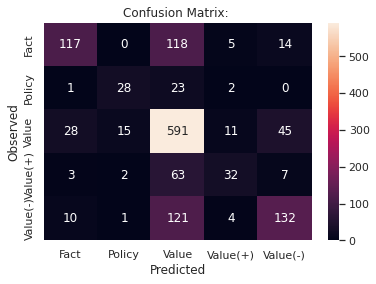

In [30]:
evaluation(tokenized_dataset['test']['label'],y_pred)

## Try more transformers

### helper functions to ease calling different transformers

In [31]:
def run_trainer(trainer, test_dataset):
  trainer.train()
  trainer.evaluate()
  trainer.predict(test_dataset=test_dataset)
  trainer.save_model()

def use_trainer(folder):
  model =  AutoModelForSequenceClassification.from_pretrained(folder, num_labels=5, ignore_mismatched_sizes=True)
  tokenizer= AutoTokenizer.from_pretrained("./results3")
  return get_prediction(tokenizer, model)


### saattrupdan/verdict-classifier

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('saattrupdan/verdict-classifier')
model =  AutoModelForSequenceClassification.from_pretrained('saattrupdan/verdict-classifier', num_labels=5)
trainer=create_trainer(model, tokenizer,'./results3')
run_trainer(trainer,tokenized_dataset["test"])

loading configuration file ./results3/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "./results3",
  "architectures": [
    "XLMRobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.19.

Report:
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       254
           1       0.00      0.00      0.00        54
           2       0.56      0.92      0.69       690
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00       268

    accuracy                           0.54      1373
   macro avg       0.21      0.27      0.23      1373
weighted avg       0.37      0.54      0.43      1373


Cohen kappa Score:
0.17171935840484454



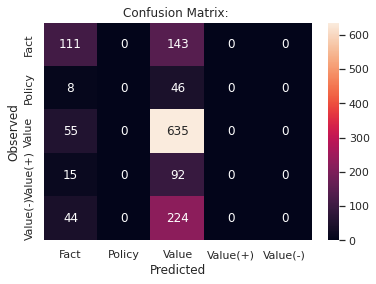

In [32]:
y_pred=use_trainer('./results3')
evaluation(tokenized_dataset['test']['label'],y_pred)

### cross-encoder/mmarco-mMiniLMv2-L12-H384-v1

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('saattrupdan/verdict-classifier')
model =  AutoModelForSequenceClassification.from_pretrained('saattrupdan/verdict-classifier', num_labels=5)
trainer=create_trainer(model, tokenizer,'./results4')
run_trainer(trainer,tokenized_dataset["test"])

loading configuration file ./results4/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "./results4",
  "architectures": [
    "XLMRobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.19.

Report:
              precision    recall  f1-score   support

           0       0.56      0.46      0.50       254
           1       0.44      0.13      0.20        54
           2       0.57      0.95      0.71       690
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00       268

    accuracy                           0.57      1373
   macro avg       0.31      0.31      0.28      1373
weighted avg       0.41      0.57      0.46      1373


Cohen kappa Score:
0.21410396394403053



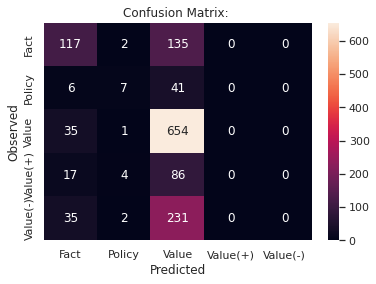

In [33]:
y_pred=use_trainer('./results4')
evaluation(tokenized_dataset['test']['label'],y_pred)

### bert-base-multilingual-cased

In [ ]:

tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
model =  AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=5)
trainer=create_trainer(model, tokenizer,'./results5')
run_trainer(trainer,tokenized_dataset["test"])



Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Epoch,Training Loss,Validation Loss,Accuracy
1,1.132200,0.995794,0.609614
2,0.871900,0.964772,0.646031
3,0.548700,0.963237,0.669337


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results5/checkpoint-687
Configuration saved in ./results5/checkpoint-687/config.json
Model weights saved in ./results5/checkpoint-687/pytorch_model.bin
tokenizer config file saved in ./results5/checkpoint-687/tokenizer_config.json
Special tokens file saved in ./results5/checkpoint-687/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results5
Configuration saved in ./results5/config.json
Model weights saved in ./results5/pytorch_model.bin
tokenizer config file saved in ./results5/tokenizer_config.json
Special tokens file saved in ./results5/special_tokens_map.json


loading configuration file ./results5/config.json
Model config BertConfig {
  "_name_or_path": "./results5",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  

Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       254
           1       0.81      0.89      0.85        54
           2       0.84      0.90      0.87       690
           3       0.73      0.66      0.70       107
           4       0.86      0.77      0.81       268

    accuracy                           0.84      1373
   macro avg       0.82      0.80      0.81      1373
weighted avg       0.84      0.84      0.84      1373


Cohen kappa Score:
0.7509978642062669



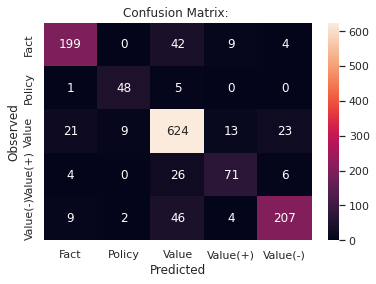

In [34]:
y_pred=use_trainer('./results5')
evaluation(tokenized_dataset['test']['label'],y_pred)

### XML Roberta

In [ ]:

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model =  AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=5)
trainer=create_trainer(model, tokenizer,'./results6')
run_trainer(trainer,tokenized_dataset["test"])


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

Epoch,Training Loss,Validation Loss,Accuracy
1,1.330200,1.301159,0.506919
2,1.326600,1.271553,0.515659
3,1.269700,1.269363,0.514202


The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results6/checkpoint-687
Configuration saved in ./results6/checkpoint-687/config.json
Model weights saved in ./results6/checkpoint-687/pytorch_model.bin
tokenizer config file saved in ./results6/checkpoint-687/tokenizer_config.json
Special tokens file saved in ./results6/checkpoint-687/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `XLMRobertaForSequenceClassification.forward`,  yo

The following columns in the test set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results6
Configuration saved in ./results6/config.json
Model weights saved in ./results6/pytorch_model.bin
tokenizer config file saved in ./results6/tokenizer_config.json
Special tokens file saved in ./results6/special_tokens_map.json


loading configuration file ./results6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "./results6",
  "architectures": [
    "XLMRobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.19.

Report:
              precision    recall  f1-score   support

           0       0.51      0.17      0.26       254
           1       0.00      0.00      0.00        54
           2       0.52      0.97      0.68       690
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00       268

    accuracy                           0.52      1373
   macro avg       0.21      0.23      0.19      1373
weighted avg       0.36      0.52      0.39      1373


Cohen kappa Score:
0.07223546662155023



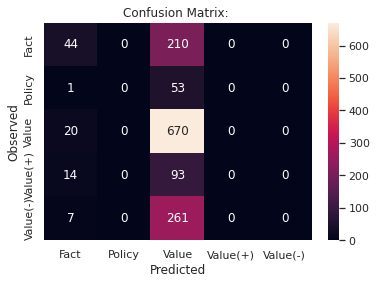

In [35]:
y_pred=use_trainer('./results6')
evaluation(tokenized_dataset['test']['label'],y_pred)

### neuralmind/bert-large-portuguese-cased

In [38]:

tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model =  AutoModelForSequenceClassification.from_pretrained('neuralmind/bert-base-portuguese-cased', num_labels=5)
# from transformers import BertConfig
# config = BertConfig() 
# config.vocab_size = tokenizer.vocab_size  # setting both to have same vocab size
trainer=create_trainer(model, tokenizer,'./results8')
run_trainer(trainer,tokenized_dataset["test"])

https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpvv6_xbwu


Downloading:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

storing https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/f1a9ba41d40e8c6f5ba4988aa2f7702c3b43768183e4b82483e04f2848841ecf.a6c00251b9344c189e2419373d6033016d0cd3d87ea59f6c86069046ac81956d
creating metadata file for /root/.cache/huggingface/transformers/f1a9ba41d40e8c6f5ba4988aa2f7702c3b43768183e4b82483e04f2848841ecf.a6c00251b9344c189e2419373d6033016d0cd3d87ea59f6c86069046ac81956d
https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp9e718ztl


Downloading:   0%|          | 0.00/647 [00:00<?, ?B/s]

storing https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/e716e2151985ba669e7197b64cdde2552acee146494d40ffaf0688a3f152e6ed.18a0b8b86f3ebd4c8a1d8d6199178feae9971ff5420f1d12f0ed8326ffdff716
creating metadata file for /root/.cache/huggingface/transformers/e716e2151985ba669e7197b64cdde2552acee146494d40ffaf0688a3f152e6ed.18a0b8b86f3ebd4c8a1d8d6199178feae9971ff5420f1d12f0ed8326ffdff716
loading configuration file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/e716e2151985ba669e7197b64cdde2552acee146494d40ffaf0688a3f152e6ed.18a0b8b86f3ebd4c8a1d8d6199178feae9971ff5420f1d12f0ed8326ffdff716
Model config BertConfig {
  "_name_or_path": "neuralmind/bert-base-portuguese-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hi

Downloading:   0%|          | 0.00/205k [00:00<?, ?B/s]

storing https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/aa6d50227b77416b26162efcf0cc9e9a702d13920840322060a2b41a44a8aff4.af25fb1e29ad0175300146695fd80069be69b211c52fa5486fa8aae2754cc814
creating metadata file for /root/.cache/huggingface/transformers/aa6d50227b77416b26162efcf0cc9e9a702d13920840322060a2b41a44a8aff4.af25fb1e29ad0175300146695fd80069be69b211c52fa5486fa8aae2754cc814
https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/added_tokens.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpoqbdspuc


Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

storing https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/added_tokens.json in cache at /root/.cache/huggingface/transformers/9188d297517828a862f4e0b0700968574ca7ad38fbc0832c409bf7a9e5576b74.5cc6e825eb228a7a5cfd27cb4d7151e97a79fb962b31aaf1813aa102e746584b
creating metadata file for /root/.cache/huggingface/transformers/9188d297517828a862f4e0b0700968574ca7ad38fbc0832c409bf7a9e5576b74.5cc6e825eb228a7a5cfd27cb4d7151e97a79fb962b31aaf1813aa102e746584b
https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmphp8fp5dx


Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

storing https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/eecc45187d085a1169eed91017d358cc0e9cbdd5dc236bcd710059dbf0a2f816.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
creating metadata file for /root/.cache/huggingface/transformers/eecc45187d085a1169eed91017d358cc0e9cbdd5dc236bcd710059dbf0a2f816.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/aa6d50227b77416b26162efcf0cc9e9a702d13920840322060a2b41a44a8aff4.af25fb1e29ad0175300146695fd80069be69b211c52fa5486fa8aae2754cc814
loading file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/tokenizer.json from cache at None
loading file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/added_tokens.json from cache at 

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

storing https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/1e42c907c340c902923496246dae63e33f64955c529720991b7ec5543a98e442.fa492fca6dcee85bef053cc60912a211feb1f7173129e4eb1a5164e817f2f5f2
creating metadata file for /root/.cache/huggingface/transformers/1e42c907c340c902923496246dae63e33f64955c529720991b7ec5543a98e442.fa492fca6dcee85bef053cc60912a211feb1f7173129e4eb1a5164e817f2f5f2
loading weights file https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/1e42c907c340c902923496246dae63e33f64955c529720991b7ec5543a98e442.fa492fca6dcee85bef053cc60912a211feb1f7173129e4eb1a5164e817f2f5f2
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.

RuntimeError: ignored

In [23]:
y_pred=use_trainer('./results8')
evaluation(tokenized_dataset['test']['label'],y_pred)

OSError: ignored

### sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

In [24]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model =  AutoModelForSequenceClassification.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', num_labels=5)

trainer=create_trainer(model, tokenizer,'./results7')
run_trainer(trainer,tokenized_dataset["test"])

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/449M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 10982
  Num E

Epoch,Training Loss,Validation Loss,Accuracy
1,1.307000,1.324317,0.492353
2,1.272600,1.273086,0.504734
3,1.151100,1.267141,0.509104


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results7/checkpoint-687
Configuration saved in ./results7/checkpoint-687/config.json
Model weights saved in ./results7/checkpoint-687/pytorch_model.bin
tokenizer config file saved in ./results7/checkpoint-687/tokenizer_config.json
Special tokens file saved in ./results7/checkpoint-687/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tokens, __index_level_0__. If tokens, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results7
Configuration saved in ./results7/config.json
Model weights saved in ./results7/pytorch_model.bin
tokenizer config file saved in ./results7/tokenizer_config.json
Special tokens file saved in ./results7/special_tokens_map.json


loading configuration file ./results7/config.json
Model config BertConfig {
  "_name_or_path": "./results7",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,


Report:
              precision    recall  f1-score   support

           0       0.47      0.59      0.52       254
           1       0.50      0.02      0.04        54
           2       0.62      0.93      0.75       690
           3       0.73      0.07      0.14       107
           4       0.62      0.04      0.07       268

    accuracy                           0.59      1373
   macro avg       0.59      0.33      0.30      1373
weighted avg       0.60      0.59      0.50      1373


Cohen kappa Score:
0.29068365765455484



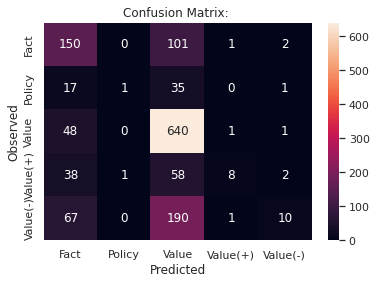

In [36]:
y_pred=use_trainer('./results7')
evaluation(tokenized_dataset['test']['label'],y_pred)

### ricardo-filho/bert-base-portuguese-cased-nli-assin

In [37]:
tokenizer = AutoTokenizer.from_pretrained('ricardo-filho/bert-base-portuguese-cased-nli-assin')
model =  AutoModelForSequenceClassification.from_pretrained('ricardo-filho/bert-base-portuguese-cased-nli-assin', num_labels=5)

trainer=create_trainer(model, tokenizer,'./results10')
run_trainer(trainer,tokenized_dataset["test"])

https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpr395x6_7


Downloading:   0%|          | 0.00/530 [00:00<?, ?B/s]

storing https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/15fb778256a0853a4555f3e9e7f5f079939bd50348e7829635e5c5f739227a29.44ba356a4a6293d6f10691edc7f7efa18e72f4345b5ae5a09689a41cc02023b6
creating metadata file for /root/.cache/huggingface/transformers/15fb778256a0853a4555f3e9e7f5f079939bd50348e7829635e5c5f739227a29.44ba356a4a6293d6f10691edc7f7efa18e72f4345b5ae5a09689a41cc02023b6
https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpbx55qec9


Downloading:   0%|          | 0.00/205k [00:00<?, ?B/s]

storing https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/441bdb9bfc2392056013b6a0d7cb56386079c853f650aa8c34706fd25292cc26.af25fb1e29ad0175300146695fd80069be69b211c52fa5486fa8aae2754cc814
creating metadata file for /root/.cache/huggingface/transformers/441bdb9bfc2392056013b6a0d7cb56386079c853f650aa8c34706fd25292cc26.af25fb1e29ad0175300146695fd80069be69b211c52fa5486fa8aae2754cc814
https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp6uh1j1eq


Downloading:   0%|          | 0.00/428k [00:00<?, ?B/s]

storing https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/df7cbba6042355488133d7218a57c48a56c9f3fc94c45ee69bebb52672234ca0.72bd70b181edaad77a72001df61e48d2715d85b03858fdcd6a99f581b9c8499c
creating metadata file for /root/.cache/huggingface/transformers/df7cbba6042355488133d7218a57c48a56c9f3fc94c45ee69bebb52672234ca0.72bd70b181edaad77a72001df61e48d2715d85b03858fdcd6a99f581b9c8499c
https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpfx369ahp


Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

storing https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/0b2ce6c8f1c2c87cfd61af61ffb498d25ea361196ace460e282ac1c0d9598c12.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
creating metadata file for /root/.cache/huggingface/transformers/0b2ce6c8f1c2c87cfd61af61ffb498d25ea361196ace460e282ac1c0d9598c12.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/441bdb9bfc2392056013b6a0d7cb56386079c853f650aa8c34706fd25292cc26.af25fb1e29ad0175300146695fd80069be69b211c52fa5486fa8aae2754cc814
loading file https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/df7cbba6042355488133d7218a57c48a56c9f3fc94c45ee

Downloading:   0%|          | 0.00/861 [00:00<?, ?B/s]

storing https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/b08824c5cb11f79cc7dd3756418972a7d6b912da13e44d3da3575763fce6799c.aee876aab3c27d27df43214872f2bd70298861f79542a18bdd57dbbdcdd66b25
creating metadata file for /root/.cache/huggingface/transformers/b08824c5cb11f79cc7dd3756418972a7d6b912da13e44d3da3575763fce6799c.aee876aab3c27d27df43214872f2bd70298861f79542a18bdd57dbbdcdd66b25
loading configuration file https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/b08824c5cb11f79cc7dd3756418972a7d6b912da13e44d3da3575763fce6799c.aee876aab3c27d27df43214872f2bd70298861f79542a18bdd57dbbdcdd66b25
Model config BertConfig {
  "_name_or_path": "ricardo-filho/bert-base-portuguese-cased-nli-assin",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,


Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

storing https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/c7330c1a2edb038842db5eb02f93459dc2ef4532470de7cff4c80af4523d0bf9.a9fa7e87d3c65e5eac938b33ada7641c5a0f9672c613f3cd45d12c5fa18f1546
creating metadata file for /root/.cache/huggingface/transformers/c7330c1a2edb038842db5eb02f93459dc2ef4532470de7cff4c80af4523d0bf9.a9fa7e87d3c65e5eac938b33ada7641c5a0f9672c613f3cd45d12c5fa18f1546
loading weights file https://huggingface.co/ricardo-filho/bert-base-portuguese-cased-nli-assin/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/c7330c1a2edb038842db5eb02f93459dc2ef4532470de7cff4c80af4523d0bf9.a9fa7e87d3c65e5eac938b33ada7641c5a0f9672c613f3cd45d12c5fa18f1546
All model checkpoint weights were used when initializing BertForSequenceClassification.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ricardo-filho/bert-

RuntimeError: ignored

### xlm-roberta-large

In [23]:
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')
model =  AutoModelForSequenceClassification.from_pretrained('xlm-roberta-large', num_labels=5)

trainer=create_trainer(model, tokenizer,'./results9')
run_trainer(trainer,tokenized_dataset["test"])

Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.out

Epoch,Training Loss,Validation Loss,Accuracy
1,1.339100,1.346338,0.466861
2,1.316800,1.360945,0.466861


The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results9/checkpoint-687
Configuration saved in ./results9/checkpoint-687/config.json
Model weights saved in ./results9/checkpoint-687/pytorch_model.bin
tokenizer config file saved in ./results9/checkpoint-687/tokenizer_config.json
Special tokens file saved in ./results9/checkpoint-687/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `XLMRobertaForSequenceClassification.forward`,  yo

Epoch,Training Loss,Validation Loss,Accuracy
1,1.339100,1.346338,0.466861
2,1.316800,1.360945,0.466861
3,1.304300,1.351910,0.466861


The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results9/checkpoint-2061
Configuration saved in ./results9/checkpoint-2061/config.json
Model weights saved in ./results9/checkpoint-2061/pytorch_model.bin
tokenizer config file saved in ./results9/checkpoint-2061/tokenizer_config.json
Special tokens file saved in ./results9/checkpoint-2061/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results9/checkpoint-687 (score: 1.3463376760482788).
The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceCla

The following columns in the test set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: __index_level_0__, tokens. If __index_level_0__, tokens are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1373
  Batch size = 16
Saving model checkpoint to ./results9
Configuration saved in ./results9/config.json
Model weights saved in ./results9/pytorch_model.bin
tokenizer config file saved in ./results9/tokenizer_config.json
Special tokens file saved in ./results9/special_tokens_map.json


## Domain Adaptation

## Conclusion